<a href="https://colab.research.google.com/github/SriKrishnaMishra/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### https://www.kaggle.com/datasets/zeesolver/social-network

About Dataset

The purpose of my model was to determine whether an employee can buy a car according to his salary, in my statistics, I have made Age and Estimated Salary the independent variable and purchase the dependent variable. and than after that have created model by applying various formulas on top of fit with the help of logistic regression, logistic regression can be used to predict usage detection for various classification problem such as also to check whether customer will buy the particular product or touch another competitor's product, And also whether a user will click on a given ad link or not?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# pandas → to read and handle the dataset.

# train_test_split → to divide data into training and testing parts.

# LogisticRegression → the actual ML algorithm.

# accuracy_score → to check how good our predictions are

In [ ]:
# Upload your Social_Network_Ads.csv in Colab
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/logistic-regression-dataset.zip")
df.head()

# head() shows the first 5 rows → helps you see what columns exist.

Saving logistic-regression-dataset.zip to logistic-regression-dataset (1).zip


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


test the model

In [ ]:
X = df[['Age','EstimatedSalary']]   # features
y = df['Purchased']                 # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Make a prediction yourself

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8875


In [ ]:
# Example: Predict for Age=30, Salary=87000
print(model.predict([[30, 87000]]))

# Output: 1 (will purchase) or 0 (won’t purchase).


[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Visualize the data

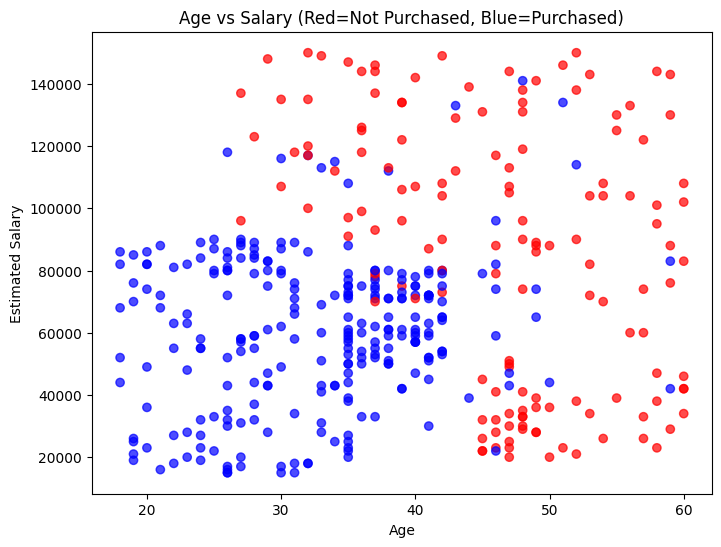

In [ ]:
# scatter plot: Age vs Salary, color by Purchased
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'], cmap='bwr', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Age vs Salary (Red=Not Purchased, Blue=Purchased)")
plt.show()


See the Sigmoid Function

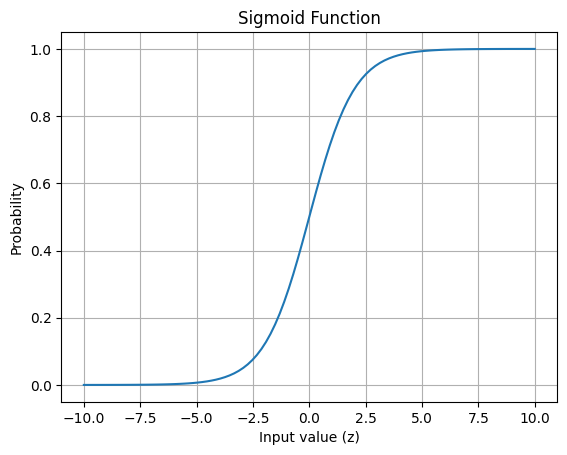

In [ ]:
import numpy as np

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# plot sigmoid
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("Input value (z)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


Visualize Model Predictions (Decision Boundary)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


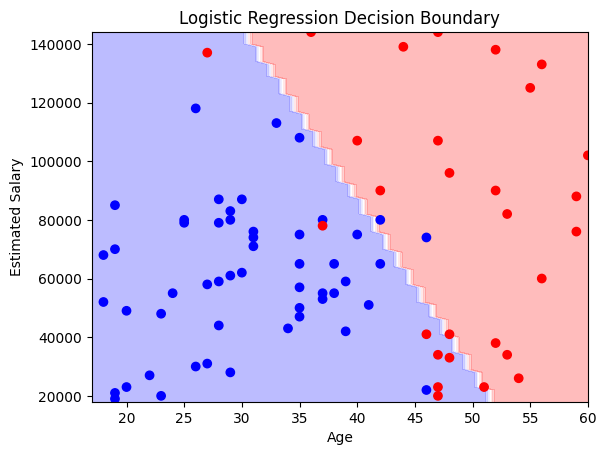

In [ ]:
import numpy as np

# create a grid of Age & Salary values
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set['Age'].min()-1, stop = X_set['Age'].max()+1, step=1),
    np.arange(start = X_set['EstimatedSalary'].min()-1000, stop = X_set['EstimatedSalary'].max()+1000, step=1000)
)

plt.contourf(X1, X2,
             model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap='bwr')

plt.scatter(X_set['Age'], X_set['EstimatedSalary'], c = y_set, cmap='bwr')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title("Logistic Regression Decision Boundary")
plt.show()

# cmap = colormap (how values are mapped to colors).
# 'bwr' means Blue-White-Red colormap.
# lowest Age in dataset, minus 1 for padding
# highest Age in dataset, plus 1 for padding
# go in steps of 1 year
# start = minimum value in the dataset (minus a little margin).
# stop = maximum value in the dataset (plus a little margin).
# step = how fine we make the grid.

Confusion Matrix (Evaluation Visualization)

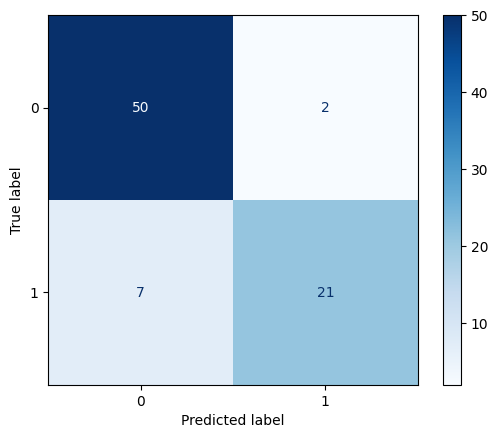

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
